In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Introduction - give some background information about your project and dataset. Describe briefly what you want to do in your analysis.


The dataset shows some parameters of students that, in theory, can affect their grades and respectively demonstrates their grades. The parameters include gender, race/ethnicity, lunch and additional courses. Also, race/ethnicity is anonymous. Besides, marks secured by the students

Data description - provide information about your dataset, size of it, and description of the columns.

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape
#dataset has 1000 rows and 8 columns

(1000, 8)

In [4]:
df.size
#number of elements in dataset

8000

In [5]:
df.columns
#name of columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.dtypes
#shows data type of each column

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Research questions - create at least 5 interseting questions that you will need to answer using data visualisation. Note that questions should not be similar. 

In [7]:
#1 Show average score in subjects for each gender
df.groupby('gender').mean()
#the result shows that males are better in math, which is technical subject. At the same time females are quite better at
#humanities, which is reading and writing

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [8]:
#2 Show how additional test preparation courses affect score
df.groupby('test preparation course').mean()
#in average completed test preparation courses helps achieving better results

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [9]:
#3 who takes more test preparation course
df.groupby(['test preparation course','gender', 'parental level of education']).size()
#there is no much difference in gender who take and do not take preparation courses

test preparation course  gender  parental level of education
completed                female  associate's degree             42
                                 bachelor's degree              22
                                 high school                    29
                                 master's degree                14
                                 some college                   42
                                 some high school               35
                         male    associate's degree             40
                                 bachelor's degree              24
                                 high school                    27
                                 master's degree                 6
                                 some college                   35
                                 some high school               42
none                     female  associate's degree             74
                                 bachelor's degree              41
 

In [10]:
#4 show students' parameters of top 10 of all subjects
df['all']=df['math score']+df['reading score']+df['writing score']
df.sort_values(by='all', ascending=False).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,all
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


In [11]:
#5 research difference between top 10 students and lowest 10
df_top=df.sort_values(by='all', ascending=False).head(10)
df_atop=df.sort_values(by='all').head(10)

In [12]:
df_top.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']).count()

math score  \
gender race/ethnicity parental level of education lunch        test preparation course               
female group C        bachelor's degree           standard     completed                         1   
       group D        bachelor's degree           free/reduced completed                         1   
                      some college                standard     none                              1   
                      some high school            standard     completed                         1   
       group E        associate's degree          standard     none                              1   
                      bachelor's degree           standard     completed                         1   
                                                               none                              1   
male   group D        some college                standard     completed                         1   
       group E        associate's degree          free/reduced completed                         1   
                      bachelor's degree           standard     completed                         1   

                                                                                        reading score  \
gender race/ethnicity parental level of education lunch        test preparation course                  
female group C        bachelor's degree           standard     completed                            1   
       group D        bachelor's degree           free/reduced completed                            1   
                      some college                standard     none                                 1   
                      some high school            standard     completed                            1   
       group E        associate's degree          standard     none                                 1   
                      bachelor's degree           standard     completed                            1   
                                                               none                                 1   
male   group D        some college                standard     completed                            1   
       group E        associate's degree          free/reduced completed                            1   
                      bachelor's degree           standard     completed                            1   

                                                                                        writing score  \
gender race/ethnicity parental level of education lunch        test preparation course                  
female group C        bachelor's degree           standard     completed                            1   
       group D        bachelor's degree           free/reduced completed                            1   
                      some college                standard     none                                 1   
                      some high school            standard     completed                            1   
       group E        associate's degree          standard     none                                 1   
                      bachelor's degree           standard     completed                            1   
                                                               none                                 1   
male   group D        some college                standard     completed                            1   
       group E        associate's degree          free/reduced completed                            1   
                      bachelor's degree           standard     completed                            1   

                                                                                        all  
gender race/ethnicity parental level of education lunch        test preparation course       
female group C        bachelor's degree           standard     completed                  1  
       group D        bachelor's degree           free/redu

In [13]:
df_atop.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']).count()

math score  \
gender race/ethnicity parental level of education lunch        test preparation course               
female group B        high school                 free/reduced none                              1   
                      some college                standard     none                              1   
                      some high school            free/reduced none                              2   
       group C        high school                 standard     none                              1   
                      some high school            free/reduced none                              1   
male   group A        some college                free/reduced none                              1   
       group B        high school                 free/reduced none                              1   
       group C        some college                free/reduced none                              1   
       group E        some high school            standard     none                              1   

                                                                                        reading score  \
gender race/ethnicity parental level of education lunch        test preparation course                  
female group B        high school                 free/reduced none                                 1   
                      some college                standard     none                                 1   
                      some high school            free/reduced none                                 2   
       group C        high school                 standard     none                                 1   
                      some high school            free/reduced none                                 1   
male   group A        some college                free/reduced none                                 1   
       group B        high school                 free/reduced none                                 1   
       group C        some college                free/reduced none                                 1   
       group E        some high school            standard     none                                 1   

                                                                                        writing score  \
gender race/ethnicity parental level of education lunch        test preparation course                  
female group B        high school                 free/reduced none                                 1   
                      some college                standard     none                                 1   
                      some high school            free/reduced none                                 2   
       group C        high school                 standard     none                                 1   
                      some high school            free/reduced none                                 1   
male   group A        some college                free/reduced none                                 1   
       group B        high school                 free/reduced none                                 1   
       group C        some college                free/reduced none                                 1   
       group E        some high school            standard     none                                 1   

                                                                                        all  
gender race/ethnicity parental level of education lunch        test preparation course       
female group B        high school                 free/reduced none                       1  
                      some college                standard     none                       1  
                      some high school            free/reduced none                       2  
       group C        high school                 standard     none                       1  
                      some high school            free/reduced none                      

In [14]:
#show how points are different from each other in average
print('math:', df['math score'].std())
print('reading:', df['reading score'].std())
print('writing:', df['writing score'].std())

math: 15.163080096009468
reading: 14.60019193725222
writing: 15.195657010869642


Data prepartion - cleaning, shaping, manipulation with the data that you have. 

In [15]:
df.dropna(how='any', inplace=True)
#drop rows where any of values is null

In [16]:
df.isnull().sum()
#number of null values in each column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
all                            0
dtype: int64

In [17]:
#remove outliers
import numpy as np
from scipy import stats
df_subjects=df.iloc[:,[5,6,7]]
z_scores = stats.zscore(df_subjects)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,all
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [18]:
#renaming columns
new_df.rename(columns={"race/ethnicity": "group"}, inplace=True)
#because it is simple to use

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
new_df

,gender,group,parental level of education,lunch,test preparation course,math score,reading score,writing score,all
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


Data Analysis and Visualisation - you need to answer questions you prepared using different charts.

Text(0.5, 1.0, 'Box Plot')

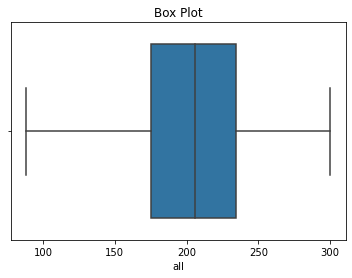

In [20]:
sns.boxplot(x=new_df['all']).set_title('Box Plot')

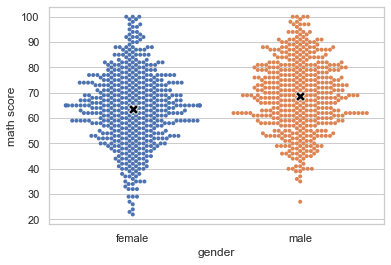

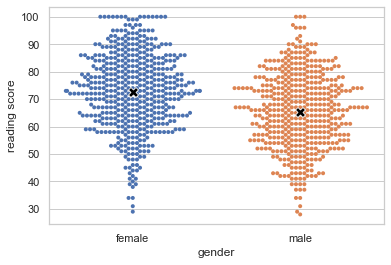

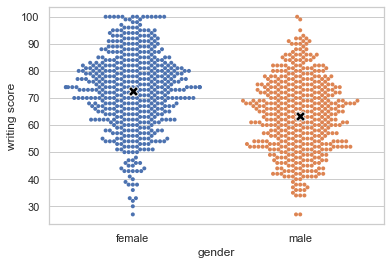

In [21]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="gender", y="math score", s=4, data=new_df)
df_means = df.groupby("gender").agg("mean").reset_index()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.scatterplot(x="gender", y="math score", marker='X', color='black', s=100, zorder=3, ax=ax, legend=False, data=df_means)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="gender", y="reading score", s=4, data=new_df)
df_means = df.groupby("gender").agg("mean").reset_index()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.scatterplot(x="gender", y="reading score", marker='X', color='black', s=100, zorder=3, ax=ax, legend=False, data=df_means)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="gender", y="writing score", s=4, data=new_df)
df_means = df.groupby("gender").agg("mean").reset_index()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.scatterplot(x="gender", y="writing score", marker='X', color='black', s=100, zorder=3, ax=ax, legend=False, data=df_means)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

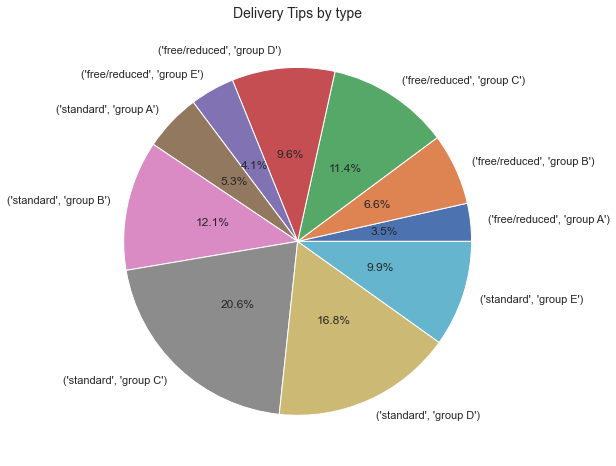

In [22]:
data=new_df.groupby(['lunch','group']).size()
pie, ax = plt.subplots(figsize=[14,8])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);
pie.savefig("DeliveryPieChart.png")

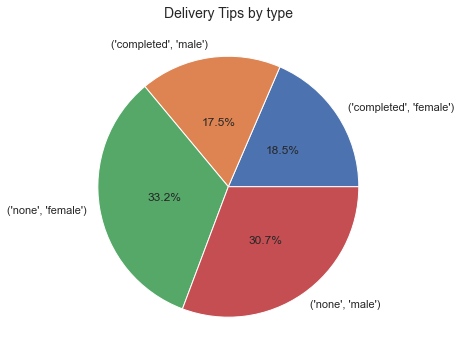

In [25]:
data=new_df.groupby(['test preparation course','gender']).size()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);
pie.savefig("DeliveryPieChart.png")

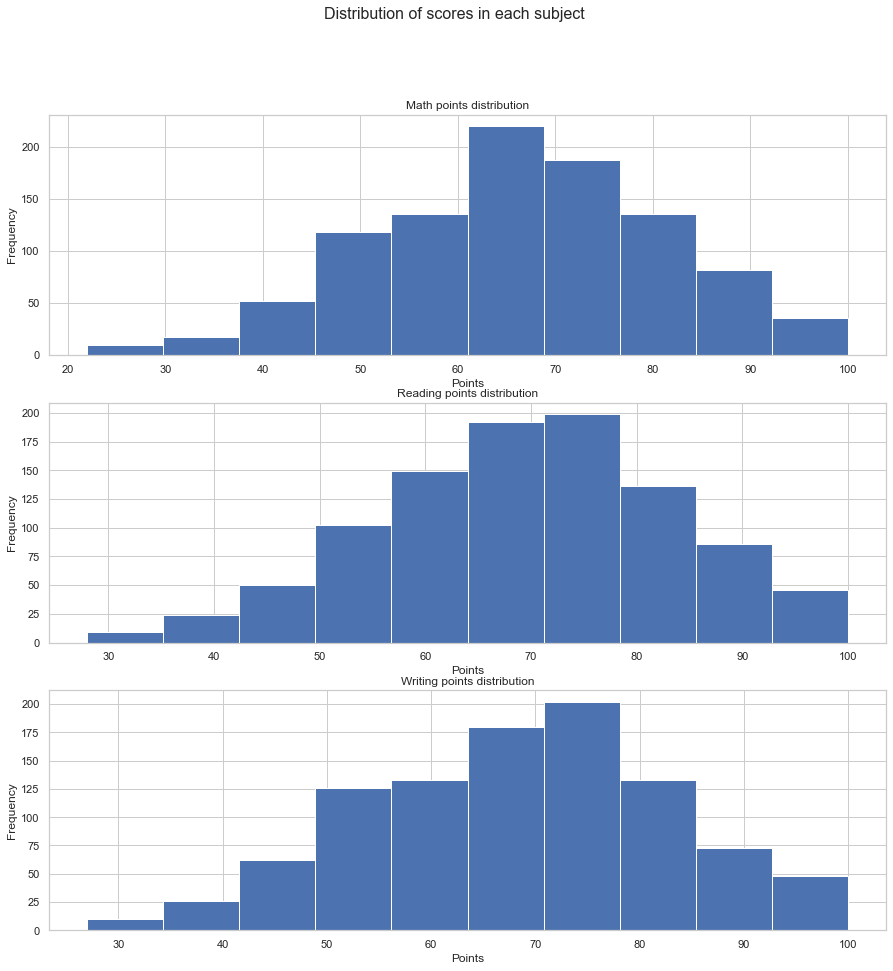

In [26]:
#show points distribution

plt.figure(figsize = (15,15))
plt.suptitle('Distribution of scores in each subject', size=16)

plt.subplot(3,1,1)
plt.hist(new_df["math score"])
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("Math points distribution")


plt.subplot(3,1,2)
plt.hist(new_df["reading score"])
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("Reading points distribution")

plt.subplot(3,1,3)
plt.hist(new_df["writing score"])
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("Writing points distribution")

plt.show()

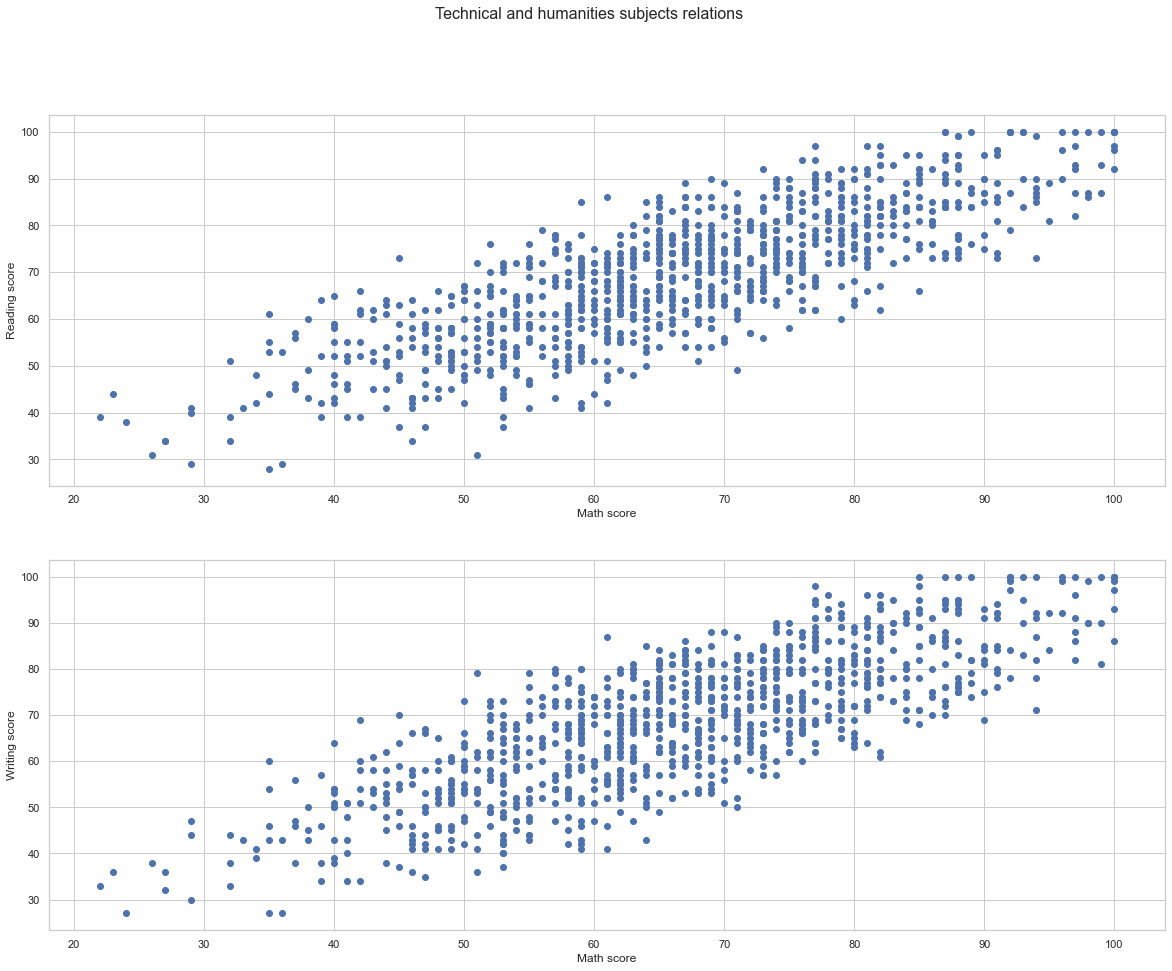

In [27]:
#Relations between Math and Reading scores and between Math and Writing scores
fig, ax = plt.subplots(2,figsize=(20,15))

plt.suptitle('Technical and humanities subjects relations', size=16)

ax[0].scatter(new_df['math score'], new_df['reading score'])
ax[0].set_xlabel('Math score')
ax[0].set_ylabel('Reading score')

ax[1].scatter(new_df['math score'], new_df['writing score'])
ax[1].set_xlabel('Math score')
ax[1].set_ylabel('Writing score')

plt.show()

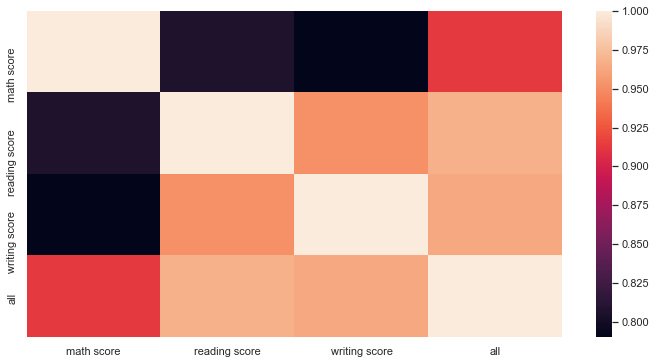

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(new_df.corr())
plt.show()

# Student who performs better at one subject, generally perfroms
# better at other subjects
# Especially if student performs better at writing, they are also
# more likely to perform better at reading.

In [29]:
#show number of students from different groupes and their gender in top 100 
df_top100=new_df.sort_values(by='all', ascending=False).head(100)
df_top100["gender"].value_counts()

female    67
male      33
Name: gender, dtype: int64

In [30]:
male_df = new_df[new_df["gender"]=="male"][["group","all"]]

In [31]:
male_df_grouped = male_df.groupby("group", as_index = False).count()
male_df_grouped.columns = ["group", "Count"]

In [32]:
female_df = new_df[new_df["gender"]=="female"][["group","all"]]
female_df_grouped = female_df.groupby("group", as_index = False).count()
female_df_grouped.columns = ["group", "Count"]

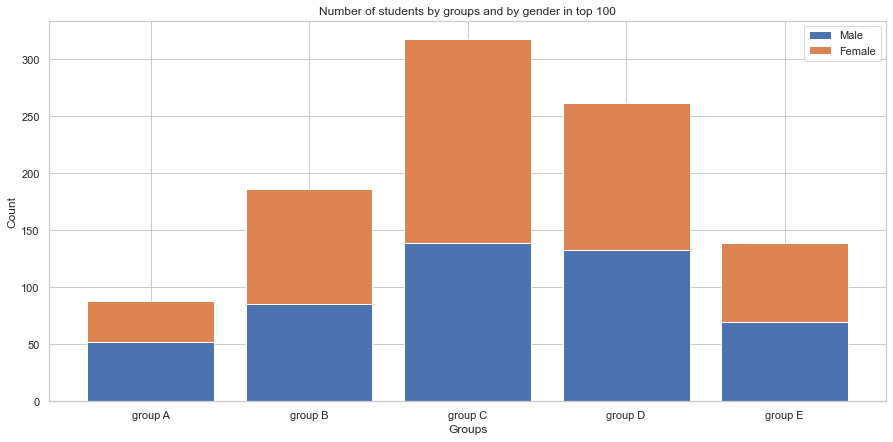

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,7))

ax.bar(male_df_grouped["group"], male_df_grouped["Count"], 0.8, label='Male')
ax.bar(female_df_grouped["group"], female_df_grouped["Count"], 0.8, bottom=male_df_grouped["Count"], label='Female')

ax.set(xticks=male_df_grouped["group"].values, 
       xlabel="Groups", ylabel="Count", 
       title="Number of students by groups and by gender in top 100")

ax.legend()

plt.show()

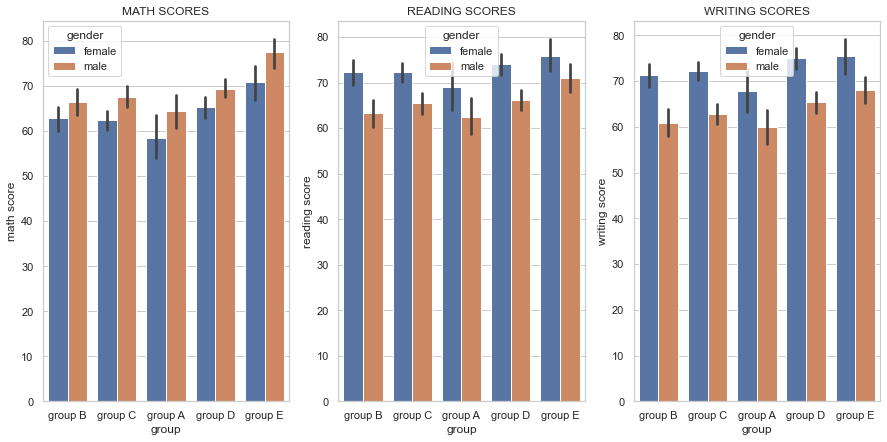

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='group',y='math score',data=new_df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='group',y='reading score',data=new_df,hue='gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='group',y='writing score',data=new_df,hue='gender')
plt.title('WRITING SCORES')
plt.show()

#Group E is generally good at all subjects

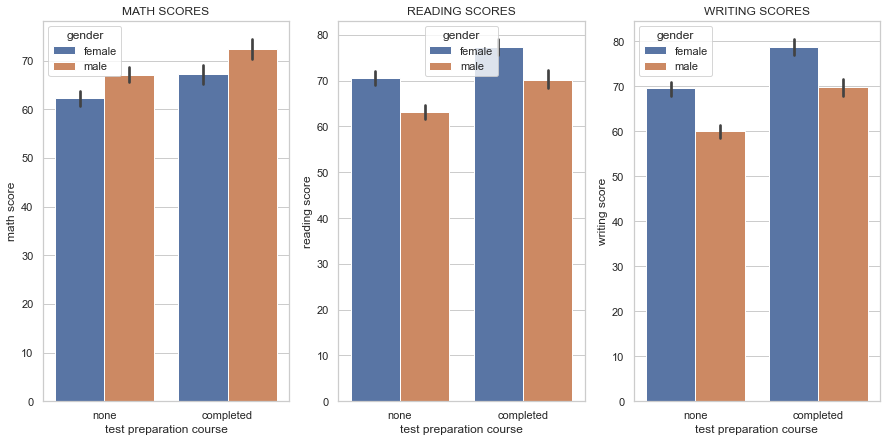

In [36]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=new_df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=new_df,hue='gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=new_df,hue='gender')
plt.title('WRITING SCORES')
plt.show()

#students thae have prepataional courses score significantly more marks. 

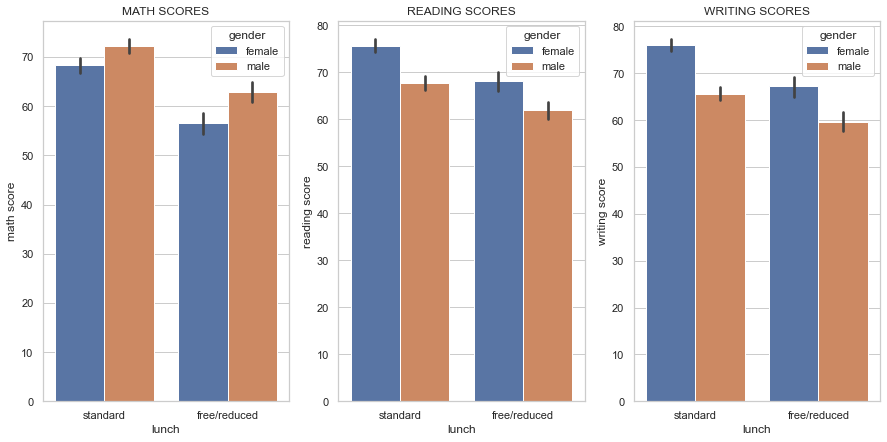

In [37]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math score',data=new_df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading score',data=new_df,hue='gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing score',data=new_df,hue='gender')
plt.title('WRITING SCORES')
plt.show()

#Students having standard lunch score more than those with free/reduced lunch

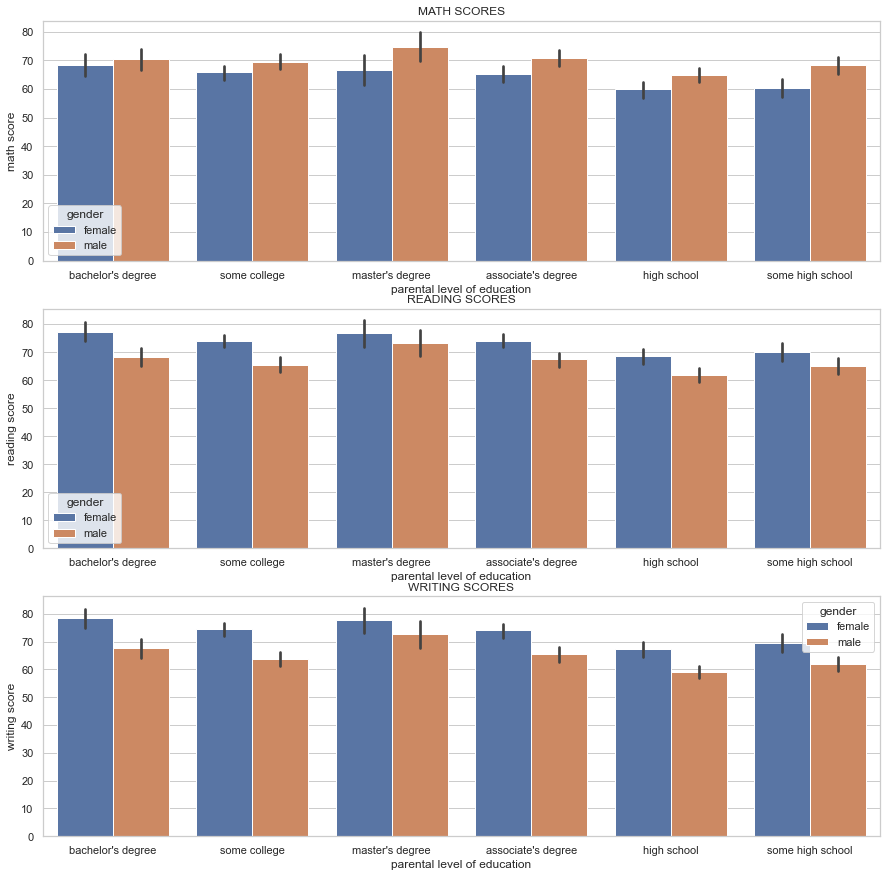

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
sns.barplot(x='parental level of education',y='math score',data=new_df,hue='gender')
plt.title('MATH SCORES')
plt.subplot(3, 1, 2)
sns.barplot(x='parental level of education',y='reading score',data=new_df,hue='gender')
plt.title('READING SCORES')
plt.subplot(3, 1, 3)
sns.barplot(x='parental level of education',y='writing score',data=new_df,hue='gender')
plt.title('WRITING SCORES')
plt.show()



In [ ]:
#To conclude, there is a lot of parameters that can affect performance in exam.
#Most obvious from my research:
#students with standard lunch tend to have higher score rather than free/reduced
#students from group E slightly better than others in performance(however, it is not significant parameter)
#students that take preparational courses are much better than ones without additional courses
#students whose parents have master degree tend to have higher marks.
#students whose parents graduated only high tend to have low marks.
#but it is not significant because 
#students whose parents graduated only some high school are better than previous group in average.